# Learning Objectives

At the end of this class, you will be able to...

- Compute probability density functions and cumulative density functions

- Use the `scipy.stats` package to compute the Survaival Value or CDF Value for a known distribution

In [6]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Probability Distribution Function (PDF)

- PDFs have a similar pattern to histogram. The only difference is that we _normalize the value of histograms_

- Let's plot the histogram for Age in our Titanic dataset

- To visualize this data, we'll use the [seaborn](https://seaborn.pydata.org/) library

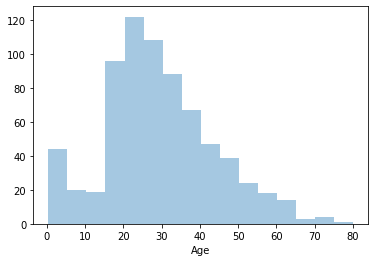

In [9]:
import seaborn as sns

sns.distplot(df['Age'].dropna(), hist=True, kde=False, bins=16) 
# Histogram of number of people in each age category
# bins = 16 --> 80/16 = 5 intervals meaning each bar is in a range of 5

## Now let's  plot the PDF of Age in Titanic

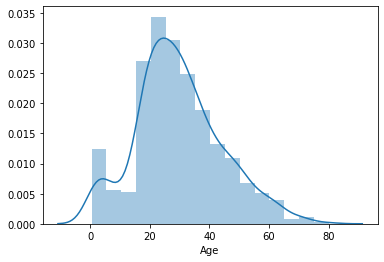

In [21]:
sns.distplot(df['Age'].dropna(), hist=True, kde=True, bins=16)
# kde = True, shows the probability distribution
# kde = a gaussian kernel density estimate.
# the area between ages 20 and 25 = 122/714 = 17%
# Area = height*5 = 122/714/5
# 5 is the distance between 20 and 25
# *** See written notes 

## Activity: In PDFs, where does the y axes numbers come from?

For example, at Age 20, why is the y-value around 0.030?

In [11]:
# custom histogram function
# ls = input list
# num_interval = number of intervals
def custom_hist(ls, num_interval):
    hist_ls_dict = dict()
    # minimum value in ls
    min_ls = np.min(ls)
    # maximum value in ls
    max_ls = np.max(ls)
    print(max_ls)
    # I = Interval
    I = ((max_ls - min_ls) / num_interval)
    print(I)
    for j in range(num_interval):
        # Create how many elements in ls are at each interval j
        hist_ls_dict[(min_ls + j*I, min_ls + (j+1) *I)]= np.sum(((min_ls + j*I) <=ls) & (ls <= (min_ls + (j+1) *I)))      
    return hist_ls_dict
        
print(custom_hist(df['Age'].dropna().values, 16))

80.0
4.97375
{(0.42, 5.39375): 44, (5.39375, 10.3675): 20, (10.3675, 15.34125): 19, (15.34125, 20.315): 96, (20.315, 25.28875): 122, (25.28875, 30.262500000000003): 108, (30.262500000000003, 35.23625): 88, (35.23625, 40.21): 67, (40.21, 45.18375): 47, (45.18375, 50.1575): 39, (50.1575, 55.13125): 24, (55.13125, 60.105000000000004): 18, (60.105000000000004, 65.07875): 14, (65.07875, 70.0525): 3, (70.0525, 75.02625): 4, (75.02625, 80.0): 1}


In [18]:
hist_dict = custom_hist(df['Age'].dropna().values, 16)
total_num_passengers = sum(hist_dict.values())
total_num_passengers

80.0
4.97375


714

In [19]:
(122/714)*100
# total percent number of passengers betweent he age of 25.28875-30.262500000000003

17.086834733893557

In [15]:
122/total_num_passengers/4.97375

0.034354028115392926

## What is the chance that a passenger would be younger than 40?

In [23]:
# Find the number of passengers younger than 40
How_many_younger_40 = df[df['Age'] <= 40]
# Find the percentage of passengers who are younger than 40
# Do this by dividing the number of passengers younger than 40 by the total number of passengers (with an age)
percent_below_40 = len(How_many_younger_40)/len(df['Age'].dropna())
percent_below_40

0.7899159663865546

## We want to obtain and plot the CDF of age
1. Write a function that counts how many elements in a given lsit(eg. age) is lower than the threshold
2. Change the threshold from minimum value of age to maximum value of age with defined step_wise

In [32]:
ls_age = df['Age'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)# element in ls is <= threshold

cdf_age = [calculate_cdf(ls_age, r)/len(ls_age)*100 for r in range(int(np.min(ls_age)), int(np.max(ls_age)))]

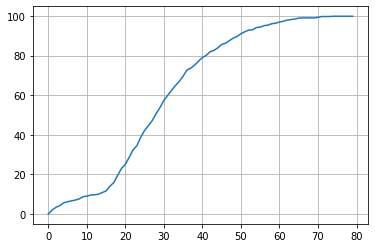

In [33]:
import matplotlib.pyplot as plt

plt.plot(range(int(np.min(ls_age)), int(np.max(ls_age))), cdf_age)
plt.grid()

## From the CDF plot, what is the chance of age is between 30 and 40?

P(30 <= Age <= 40) = Fx(40) - Fx(30)
= 0.8 - 0.6 = 0.2

# Use Seaborn or Matplotlib to plot CDF of Age

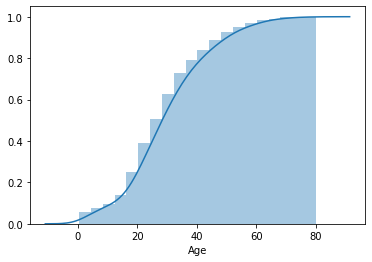

In [34]:
 sns.distplot(df['Age'].dropna(), hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

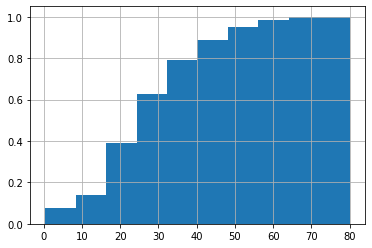

In [35]:
df['Age'].dropna().hist(cumulative=True, density=True)

# More about PDF

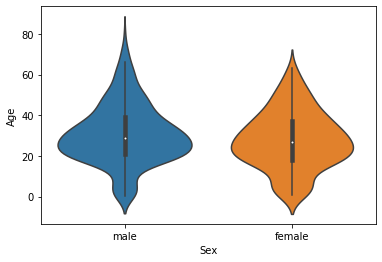

In [36]:
sns.violinplot(x='Sex', y='Age', data=df)

> - Oldest gender: Male

## Normal Distribution

- It is possible that when we plot a histogram or PDF of an array, it has a Bell Shape 

- The name of this histogram with the bell shape is **Normal**

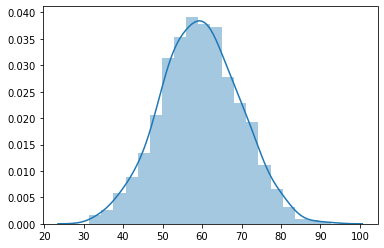

In [47]:
# Generate 1000 samples with 60 as its mean and 10 as its std
# the mean and std must be defined!

a = np.random.normal(60, 10, 1000)
sns.distplot(a, hist=True, kde=True, bins=20)

> - Length of a: 1000
> - Mean of a: 60
> - STD of a: 10

## What is the chance that the numbers in list a would be between (50, 70)?

In [59]:
from scipy.stats import norm

(norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10))*100

68.26894921370858

In [64]:
def percentage_lower(ls, lower, upper):
    return len([i for i in ls if lower<= i and i <=upper])/len(ls) # (50<=a<=70)/(len(a))


a = np.random.normal(60, 10, 100000)
print(percentage_lower(a, 50, 70)*100) 

68.246


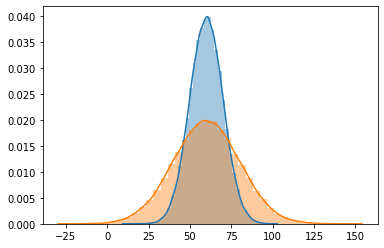

In [62]:
import numpy as np
import seaborn as sns

a = np.random.normal(60, 10, 100000)
sns.distplot(a, hist=True, kde=True, bins=40) # the graph has a higher and narrower peak because 

b = np.random.normal(60, 20, 100000)
sns.distplot(b, hist=True, kde=True, bins=40) # the graph has a wider and shorter peak because 

## Activity:

Let's prove that these normal distribution properties are true. 
> - Show that about 68% of the values in our previous DS final exam example are in the [50, 70] range for list a
> - Show that the same is for [40, 80] for list b

In [77]:
# scale is the STD
norm.cdf(70, loc=60, scale=10) - norm.cdf(50, loc=60, scale=10)

0.6826894921370859

In [80]:
norm.cdf(80, loc=60, scale=20) - norm.cdf(40, loc=60, scale=20)

0.6826894921370859

## Activity: 

The DS 1.1 instructor just finished grading the final exam. He is reporting that the mean was 60 (with the possible score range from 0 to 100) with standard deviation of 10.

What is the probability that students got more than 70? Assume that the instructor plotted the PDF of the data and it was _normal_

**Hint:** If we can obtain area of the graph for everything less than 70, that's the same as getting the CDF at 70! How would this be useful?
**Hint:** look into this [library from the  scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm). It may be helpful :) 

In [71]:
from scipy.stats import norm

# Generate atificial data:
grade = np.random.normal(60, 10, 100)

# look at the table: 1 - CDF of normal(70)
1 - norm.cdf(70, loc=60, scale=10) # 1 - cdf is called survival

# or

print(norm.sf(70, loc=60, scale=10))

0.15865525393145707


In [72]:
# What is the number of students that scored less than 70?
norm.cdf(70, loc=60, scale=10)

0.8413447460685429

## Scaling the Normal Ditribution

We can take any list of values which are normally distribute and apply simple arithmatic on the list such that the mean is 0 and the standard deviation is 1 for our new transformed list. We can do this through following the steps below:

For each of the values in the list, we will need to _subtract the mean of list from the value, and divide this difference by the standard deviation_

Let's walk through this using the DS final exam data and normally distributing it:

In [74]:
# Our list of exam scores with mean = 60, and std = 10
exam_scores = np.random.normal(60, 10, 1000)

normalized_scores = []
for score in exam_scores:
    # subtract the mean of list from the value, 
    # and divide this difference by the standard deviation
    normal_score = (score - 60)/10
    normalized_scores.append(normal_score)

np.mean(normalized_scores)

0.0018942730825825826

In [75]:
np.std(normalized_scores)

0.9731975859420782

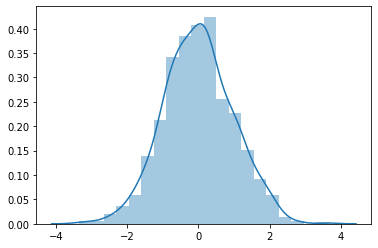

In [76]:
sns.distplot(normalized_scores, hist=True, kde=True, bins=20)

## Normal Distribution Properties:

When the data is Normally distributed:

- 68% of the data is captured within one standard deviation from the mean.
- 95% of the data is captured within two standard deviations from the mean.
- 99.7% of the data is captured within three standard deviations from the mean.

<br><img src="http://www.oswego.edu/~srp/stats/images/normal_34.gif" /><br>

### For any normal distributed list, if we subtract all the elements from its mean and then divide all the elements by its STD, then the new list:
> - 1. zero mean
> - 2. STD = 1

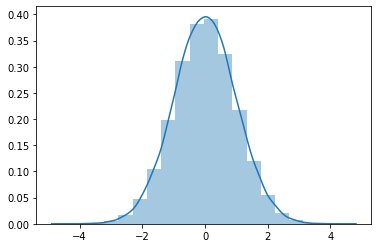

In [95]:
a = np.random.normal(60, 10, 100000)
a_scaled = [(i - np.mean(a))/np.std(a) for i in a]

sns.distplot(a_scaled, hist=True, kde=True, bins=20)

In [96]:
np.mean(a_scaled)

8.111555871437304e-16

In [93]:
np.std(a_scaled)

1.0

## Z-Distribution 

**Z-distribution is another name for standard Normal distribution!** This is what we just calculated in the last example!

Following the process as outlined above will allow you to calculate the z-distribution of a data set!
> - it has a zero mean
> - unit standard distribution